<h1 style="color: lightblack;">Credit Card Fraud Detection Using Machine Learning Algorithms</h1>
<h3 style="color: lightgreen;">Random Forest - Support Vector Machine - Logistic Regression.</h3>
<h4 style="color: lightblue;">Project Overview:</h4>
The goal of this project is to develop a machine learning model to detect fraudulent credit card transactions.  
Credit card fraud is a significant problem for financial institutions and consumers, and early detection of   
fraudulent transactions is crucial to prevent financial losses. In this project, we will use three different machine learning algorithms:  
Random Forest, Logistic Regression, and Support Vector Machine (SVM) — to identify patterns in transaction data that indicate fraud.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

In [11]:
from IPython.display import display, HTML

We can download the data from https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/data

In [16]:
df = pd.read_csv(r'D:\Data Science\Credit Card Fraud\card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


### Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [16]:
df["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [17]:
print( "Fraud to no-fraud rate is:", (df["fraud"] == 1).sum()/(df["fraud"] == 0).sum())

Fraud to no-fraud rate is: 0.09577392868922427


###  Evaluating the security of Chip and Pin Transaction methods

In [3]:
chippindf= df[["used_chip", "used_pin_number","fraud"]]

In [10]:
total_transactions = len(chippindf)
total_fraud = chippindf["fraud"].sum()
fraud_by_chip = chippindf[chippindf["used_chip"]==1]["fraud"].sum()
fraud_by_pin = chippindf[chippindf["used_pin_number"]==1]["fraud"].sum()

In [12]:
print("Total Transactions", total_transactions)
print("total fraud cases", total_fraud)
print("total chip frauds {} out of {}".format(fraud_by_chip, total_transactions))
print("total pin frauds {} out of {}".format(fraud_by_pin, total_transactions))

Total Transactions 1000000
total fraud cases 87403.0
total chip frauds 22410.0 out of 1000000
total pin frauds 273.0 out of 1000000


Let's create a view...

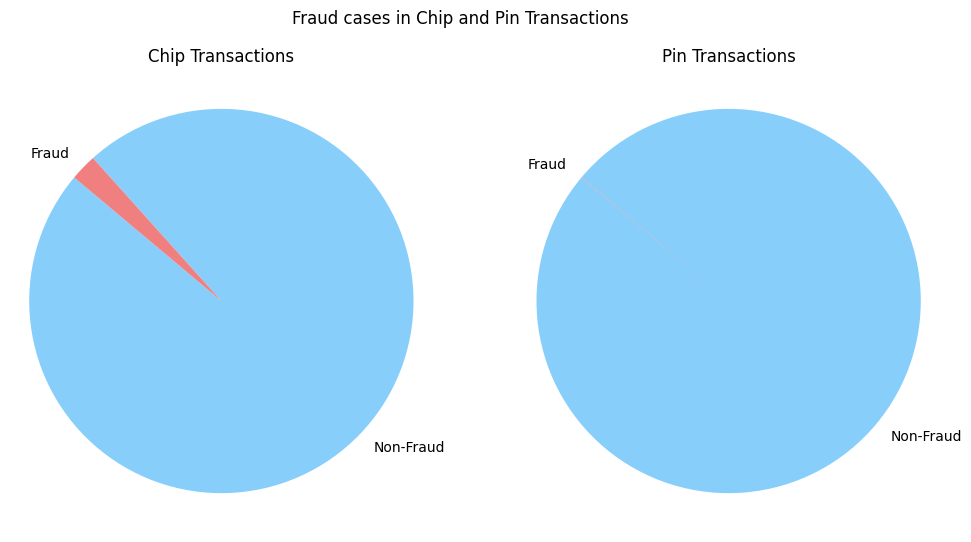

In [19]:
labels_chip = ["Non-Fraud", "Fraud"]
sizes_chip = [total_transactions - fraud_by_chip, fraud_by_chip]
colors_chip = ["lightskyblue", "lightcoral"]

labels_pin = ["Non-Fraud", "Fraud"]
sizes_pin = [total_transactions - fraud_by_pin, fraud_by_pin]
colors_pin = ["lightskyblue", "lightcoral"]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes_chip, labels=labels_chip, colors=colors_chip, startangle=140)
plt.axis("equal")
plt.title("Chip Transactions")

plt.subplot(1, 2, 2)
plt.pie(sizes_pin, labels=labels_pin, colors=colors_pin, startangle=140)
plt.axis("equal")
plt.title("Pin Transactions")

plt.suptitle("Fraud cases in Chip and Pin Transactions")
plt.show()

### Analyzing repeat retailer Fraud Patterns 

In [6]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
repeat_retailer_df=df[df["repeat_retailer"]==1]

In [4]:
repeat_retailer_df=df[df["repeat_retailer"]==1]
fraud_sequences=[]
current_sequence=[]


for index, row in repeat_retailer_df.iterrows():
    repeat_retailer, is_fraud=row["repeat_retailer"], row["fraud"]
    if is_fraud==1:
        if current_sequence:
            fraud_sequences.append(current_sequence.copy())
        current_sequence=[]
    else:
        current_sequence.append("Repeat Retailer" if repeat_retailer==1 else "No Repeat Retailer")

for i, sequence in enumerate(fraud_sequences[:10], start =1):
    print(f"Fraud Sequence {i}: {', '.join(sequence)}")

Fraud Sequence 1: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 2: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 3: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 4: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 5: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 6: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer
Fraud Sequence 7: Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retailer, Repeat Retail

In [6]:
# Calculate lengths of each fraud sequence
limited_sequences = fraud_sequences[:10]
# Calculate lengths of each limited fraud sequence
sequence_lengths = [len(sequence) for sequence in limited_sequences]


These visualizations can help to understand the patterns of repeated transactions leading up to fraud. 
The bar chart shows the length of sequences before fraud, while the stacked bar chart can provide a more
granular view of individual transactions.

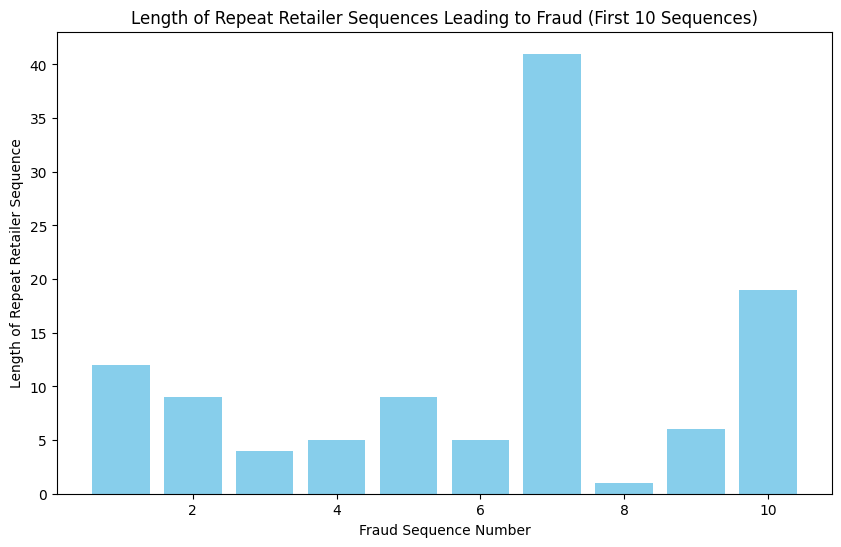

In [7]:
# Plotting the lengths of limited fraud sequences
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sequence_lengths) + 1), sequence_lengths, color='skyblue')
plt.xlabel('Fraud Sequence Number')
plt.ylabel('Length of Repeat Retailer Sequence')
plt.title('Length of Repeat Retailer Sequences Leading to Fraud (First 10 Sequences)')
plt.show()

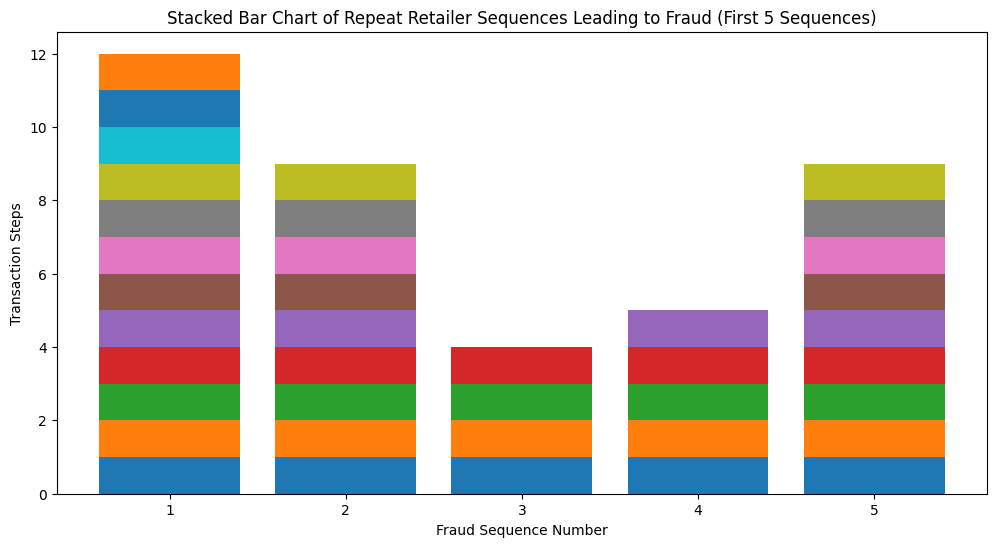

In [5]:
limited_sequences = fraud_sequences[:5]
# Prepare data for a stacked bar chart
max_sequence_length = max(len(seq) for seq in limited_sequences)
fraud_sequences_padded = [seq + [""] * (max_sequence_length - len(seq)) for seq in limited_sequences]

# Transpose the data for easier plotting
stacked_data = list(zip(*fraud_sequences_padded))

# Plotting the stacked bar chart with reduced samples
plt.figure(figsize=(12, 6))
for i, data in enumerate(stacked_data):
    plt.bar(range(1, len(data) + 1), [1 if x == "Repeat Retailer" else 0 for x in data],
            bottom=[i for _ in range(len(data))], label=f'Step {i+1}' if i == 0 else "")

plt.xlabel('Fraud Sequence Number')
plt.ylabel('Transaction Steps')
plt.title('Stacked Bar Chart of Repeat Retailer Sequences Leading to Fraud (First 5 Sequences)')
plt.show()

### Finding correlation between transaction-amount and fraud

In [3]:
correlation_df=df[["ratio_to_median_purchase_price", "fraud"]]

In [4]:
correlation=correlation_df["ratio_to_median_purchase_price"].corr(correlation_df["fraud"])
print(f"Correlation between transaction amount and fraud:{correlation}")

Correlation between transaction amount and fraud:0.46230472228825864


In [6]:
avgnonfraudtransaction=correlation_df[correlation_df["fraud"]==0]["ratio_to_median_purchase_price"].mean()
avgfraudtransaction=correlation_df[correlation_df["fraud"]==1]["ratio_to_median_purchase_price"].mean()
print(f"Average ratio to median purchase price for non fraudulent transactions:{avgnonfraudtransaction}")
print(f"Average ratio to median purchase price for  fraudulent transactions:{avgfraudtransaction}")

Average ratio to median purchase price for non fraudulent transactions:1.423641855458059
Average ratio to median purchase price for  fraudulent transactions:6.006323490486969


Previous results show non fraudulent transactions have a ratio that is 1.42 times the median purchase price meanwhile the ratio of fraudulent transactions is 6 times which means that fraudulent transactions are related to higher amounts

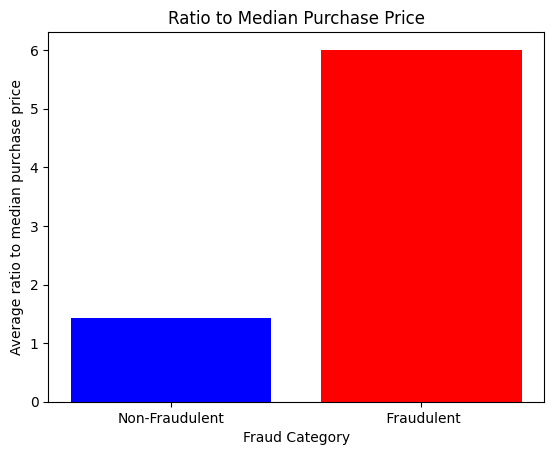

In [10]:
categories =["Non-Fraudulent" , " Fraudulent"]
average_ratio=[avgnonfraudtransaction, avgfraudtransaction]
plt.bar(categories,average_ratio,color=['blue','red'])
plt.title("Ratio to Median Purchase Price")
plt.xlabel("Fraud Category")
plt.ylabel("Average ratio to median purchase price")
plt.show()

### Analyzing Fraud Cases in Online Transactions 

In [4]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
online_order_df=df[["online_order", "fraud"]]

In [8]:
total_online_orders=online_order_df["online_order"].sum()
total_online_fraud=online_order_df[(online_order_df["fraud"]==1)&(online_order_df["online_order"]==1)]["fraud"].count()
fraud_rate_online=total_online_fraud/total_online_orders
total_offline_orders=len(online_order_df)-total_online_orders
total_offline_fraud=online_order_df[(online_order_df["fraud"]==1)&(online_order_df["online_order"]==0)]["fraud"].count()
fraud_rate_offline=total_offline_fraud/total_offline_orders

print(f"Fraud rate for online transactions: {fraud_rate_online:.2%} ({total_online_fraud} cases out of {total_online_orders} online  transactions)")
print(f"Fraud rate for offline transactions: {fraud_rate_offline:.2%} ({total_offline_fraud} cases out of {total_offline_orders} offline  transactions)")




Fraud rate for online transactoins: 12.71% (82711 cases out of 650552.0 online  transactions)
Fraud rate for offline transactoins: 1.34% (4692 cases out of 349448.0 offline  transactions)


## Model Creation
For each model we will do a quick test with random data.

### Random Forest

In [18]:
X=df.drop("fraud",axis=1)
y=df["fraud"]

#### Feature Importance

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
rf_classifier=RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train,y_train)
feature_importances=pd.Series(rf_classifier.feature_importances_,index=X.columns).sort_values(ascending=False)
#print("Ranked Feature Importance:")
display(HTML("<h3>Ranked Feature Importance:</h3>"))
print(feature_importances)

ratio_to_median_purchase_price    0.527171
online_order                      0.169382
distance_from_home                0.134910
used_pin_number                   0.063928
used_chip                         0.052078
distance_from_last_transaction    0.045711
repeat_retailer                   0.006820
dtype: float64


In [7]:
X=df.drop("fraud",axis=1)
y=df["fraud"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
rf_classifier=RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train,y_train)
new_transaction_features=df.sample(1).drop('fraud',axis=1)
print("\nRandomly sampled featured for new trnsaction:")
print(new_transaction_features)
prediction=rf_classifier.predict(new_transaction_features)
print("\nPrediction for new transaction")
print("Fraud" if prediction[0]==1 else "Legitimate")


Randomly sampled featured for new trnsaction:
        distance_from_home  distance_from_last_transaction  \
281128            1.059406                        2.614135   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
281128                        1.666857              0.0        0.0   

        used_pin_number  online_order  
281128              1.0           1.0  

Prediction for new transaction
Legitimate


In [7]:
new_transaction_features1=pd.DataFrame({'distance_from_home':[80],   
                                       'distance_from_last_transaction':[75],
                                       'ratio_to_median_purchase_price':[5.1],
                                       'repeat_retailer':[0],
                                       'used_chip':[1],
                                       'used_pin_number':[0],
                                       'online_order':[0]})

prediction=rf_classifier.predict(new_transaction_features1)
print("\nPrediction for new transaction")
print("Fraud" if prediction[0]==1 else "Legitimate")


Prediction for new transaction
Fraud


### Logistic Regression

In [7]:
X=df.drop("fraud",axis=1)
y=df['fraud']

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)
logreg_classifier=LogisticRegression(max_iter=1000, random_state=42)
logreg_classifier.fit(X_train_scaled,y_train)
##########
new_transaction_features1=pd.DataFrame({'distance_from_home':[89],   
                                       'distance_from_last_transaction':[15],
                                       'ratio_to_median_purchase_price':[2.3],
                                       'repeat_retailer':[1],
                                       'used_chip':[0],
                                       'used_pin_number':[1],
                                       'online_order':[1]})

prediction=logreg_classifier.predict(scaler.transform(new_transaction_features1))
print("\nPrediction for new transaction:")
print("Fraud" if prediction[0]==1 else"Legitimate")


Prediction for new transaction:
Legitimate


### Support Vector Machine

In [2]:
# Since SVM takes too long we will sample 1000 rows from the data frame
df = pd.read_csv(r'D:\Data Science\Credit Card Fraud\card_transdata.csv').sample(50000,random_state=42)

In [3]:
X=df.drop("fraud",axis=1)
y=df["fraud"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_classifier=SVC(kernel="linear", probability=True, random_state=42)
calibrated_svm=CalibratedClassifierCV(svm_classifier)
calibrated_svm.fit(X_train_scaled, y_train)
distance_from_home=float(input("Enter Distance From Home"))
distance_from_last_transaction=float(input("Enter distance from last transaction"))
ratio_to_median_purchase_price=float(input("Enter ratio to median purchase price"))
repeat_retailer=int(input("Enter repeat_retailer 0 or 1"))
used_chip=int(input("Enter used_chip 0 or 1"))
used_pin_number=int(input("Enter used_pin_number 0 or 1"))
online_order=int(input("Enter online_order 0 or 1"))
new_transaction_features2=pd.DataFrame({'distance_from_home':[distance_from_home],   
                                       'distance_from_last_transaction':[distance_from_last_transaction],
                                       'ratio_to_median_purchase_price':[ratio_to_median_purchase_price],
                                       'repeat_retailer':[repeat_retailer],
                                       'used_chip':[used_chip],
                                       'used_pin_number':[used_pin_number],
                                       'online_order':[online_order]})
scaled_transaction = scaler.transform(new_transaction_features2)
prediction=calibrated_svm.predict(scaled_transaction)
probability_of_fraud = calibrated_svm.predict_proba(scaled_transaction)[:,1][0]
print("\nPrediction for New Transaction:")
print("Fraud" if prediction[0]==1 else "Legitimate")
print(f"probability of Fraud:{probability_of_fraud*100:.2f}%")








Prediction for New Transaction:
Fraud
probability of Fraud:84.70%


## Model Evaluation

In [13]:
y_pred= logreg_classifier.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1=f1_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
#print("\nLogistic Regression - Evaluation Metrics:")
display(HTML("<h3>Logistic Regression - Evaluation Metrics</h3>"))
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.8902
Recall: 0.5974
F1 Score: 0.7150
Accuracy: 0.9585


In [14]:

y_pred= calibrated_svm.predict(X_test_scaled)
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1=f1_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
#print("\nSupport Vector Machines - Evaluation Metrics:")
display(HTML("<h3>Support Vector Machine - Evaluation Metrics</h3>"))
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Precision: 0.8978
Recall: 0.5834
F1 Score: 0.7073
Accuracy: 0.9579


In [9]:
y_pred= rf_classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1=f1_score(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)
print("\nEvaluation Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Evaluation Metrics:
Precision: 1.0000
Recall: 0.9999
F1 Score: 0.9999
Accuracy: 1.0000
